In [35]:
import numpy as np
import pandas as pd
import os
from openpyxl import utils
import warnings
import statistics
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.stats import fisher_exact

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [87]:
统计 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据.xlsx', sheet_name='统计用100例')
交差 = pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/紫杉醇干净的数据.xlsx', sheet_name='交差100例')
不良反应=pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/不良反应总结.xlsx')
不良等级=pd.read_excel('C:/Users/NC-O10/Dropbox/云蜚科技/脂质紫杉醇/不良反应总结等级.xlsx')

In [88]:
## 一. 描述性分析

In [89]:
#年龄recoding
from datetime import datetime
确诊年龄= 统计['确诊年龄']
df = pd.DataFrame(确诊年龄)

# Remove rows with NA values
年龄 = df.dropna()
#print(年龄)
中位数_年龄=np.mean(年龄)
年龄max=np.max(年龄)
年龄min=np.min(年龄)
print(中位数_年龄)
print(年龄min)
print(年龄max)
#recode 年龄 greater than mean=1, lower than mean=0
# Assuming you have a DataFrame with an 'Age' column
# Sample age values with NA
ages = 统计['确诊年龄']
年龄_中位 = pd.DataFrame({'Age': ages})
# Fill NA values with a specific value (e.g., 0)
年龄_中位['Age'] = 年龄_中位['Age'].fillna(64)

#print(年龄_中位)
年龄recode = pd.DataFrame({'Age': 统计['确诊年龄']})

# Calculate the mean age
mean_age = 64.1

# Create a new column for recoded categories
年龄recode['Age_Category'] = ''
年龄recode=年龄recode.fillna(0)
# Recode ages based on mean
年龄recode.loc[年龄recode['Age'] > mean_age, 'Age_Category'] = '1'
年龄recode.loc[年龄recode['Age'] < mean_age, 'Age_Category'] = '0'

# Print the updated DataFrame
#print(年龄recode)
ALK=统计['ALK']
ALK=统计['ALK'].fillna(0)
ALK_recoded = ALK.where(ALK != '阴性', 0)
pfs=统计['有无PFS事件']

#print(ALK_recoded)
#calculate the fisher's exact test p-value
from scipy.stats import fisher_exact
import pandas as pd
# Assuming you have a DataFrame with exposure and outcome columns
紫杉醇_年龄 = pd.DataFrame({'Exposure': 年龄recode['Age_Category'],
                   'Outcome': pfs})
# Use replace() method to recode the variable
# Extract the exposure and outcome columns as separate variables
exposure = 紫杉醇_年龄['Exposure']
outcome = 紫杉醇_年龄['Outcome']
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(pd.crosstab(exposure, outcome))
# Print the results
#print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

64.11627906976744
38.0
81.0
p-value: 0.06990355890641184


In [90]:
#性别
sex=统计['性别'].describe()
print(sex)

紫杉醇_sex = pd.DataFrame({'Exposure': 统计['性别'],'Outcome': pfs})

exposure = 紫杉醇_sex['Exposure']
outcome = 紫杉醇_sex['Outcome']
p_value = fisher_exact(pd.crosstab(exposure, outcome))
print("p-value:", p_value)

count     100
unique      2
top         男
freq       98
Name: 性别, dtype: object
p-value: SignificanceResult(statistic=0.8148148148148148, pvalue=1.0)


In [91]:
#清病理
病理=统计['清病理'].value_counts()
print(病理)
import numpy as np

qbl=pd.DataFrame(统计['清病理'])
qblfilled=qbl.fillna(0)

def recode(value, mapping):
    return np.vectorize(mapping.get)(value, value)

# Example usage
original_values = qblfilled
mapping = {
    "鳞状细胞癌": 1,
    "非小细胞癌": 2,
    "腺癌": 3,
}

统计['清病理']=统计['清病理'].fillna(0)
qblrecoded_values = recode(original_values, mapping)
qbl1=np.where(qblrecoded_values==1,1,0)
统计['清病理1']=qbl1
qbl2=np.where(qblrecoded_values==2,1,0)
统计['清病理2']=qbl2
qbl3=np.where(qblrecoded_values==3,1,0)
统计['清病理3']=qbl3
from scipy.stats import fisher_exact
import pandas as pd

# Create a DataFrame with two columns
data = {'Column1': 统计['清病理1'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("鳞状细胞癌:", p_value)

data = {'Column1': 统计['清病理2'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("非小细胞癌:", p_value)

data = {'Column1': 统计['清病理3'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform Fisher's exact test
p_value = fisher_exact(contingency_table)

# Print the results
#print("Odds Ratio:", odds_ratio)
print("腺癌:", p_value)

清病理
鳞状细胞癌    85
非小细胞癌    10
腺癌        4
Name: count, dtype: int64
鳞状细胞癌: SignificanceResult(statistic=0.9240121580547113, pvalue=1.0)
非小细胞癌: SignificanceResult(statistic=1.25, pvalue=0.750477214893575)
腺癌: SignificanceResult(statistic=0.3939393939393939, pvalue=0.625078897538397)


In [92]:
统计['清病理'] = 统计['清病理'].fillna('0')

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['清病理'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

Chi-square statistic: 1.9726678550207963
联合免疫用药通用名: 0.578098930016758


In [93]:
#TNM
#只分三四。
TNM=统计['TNM分期'].value_counts()
#print(TNM)
#recode TNM
original_tnm = 统计['TNM分期']
recode_mapping = {'IVA': 'IV', 'IVB': 'IV', 'IIIB': 'III', 'IIIC': 'III'}
tnm_recoded = [recode_mapping.get(string, string) for string in original_tnm]
#print(tnm_recoded)
统计['TNMre']=tnm_recoded
TNMrecoded=统计['TNMre'].value_counts()
print(TNMrecoded)
#fisher test
data = {'Column1': 统计['TNMre'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Column1'], df['Column2'])
p_value = fisher_exact(contingency_table)
print("TNM:", p_value)

TNMre
IV     63
III    37
Name: count, dtype: int64
TNM: SignificanceResult(statistic=3.375, pvalue=0.006940426768031961)


In [94]:
#EGFR
EGFR=统计['EGFR'].value_counts()
统计['EGFR'] = 统计['EGFR'].fillna('阴性')
print(EGFR)

#fisher test
data = {'Column1': 统计['EGFR'], 'Column2': 统计['有无PFS事件']}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Column1'], df['Column2'])
p_value = fisher_exact(contingency_table)
print("EGFR:", p_value)

EGFR
阴性    40
阳性     1
Name: count, dtype: int64
EGFR: SignificanceResult(statistic=0.0, pvalue=0.45)


In [95]:
#ALK
ALK=统计['ALK'].value_counts()
统计['ALK'] = 统计['ALK'].fillna('阴性')
print(ALK)



ALK
阴性    40
Name: count, dtype: int64


In [96]:
#用药周期
用药周期=统计['最大用药周期数更新'].value_counts()
print(用药周期)


最大用药周期数更新
4    31
2    30
3    19
5    12
6     6
8     1
7     1
Name: count, dtype: int64


In [97]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['EGFR'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("EGFR:", p_value)

Chi-square statistic: 0.010203040506070802
EGFR: 0.9195424417438276


In [98]:
#剂量
剂量=统计['紫杉醇脂质体总剂量（mg）'].describe()
print(剂量)
统计['紫杉醇脂质体总剂量（mg）']=统计['紫杉醇脂质体总剂量（mg）'].fillna(794)
import pandas as pd
from scipy.stats import ttest_ind

# Create a DataFrame with two columns of data
df = pd.DataFrame({'Column1': 统计['紫杉醇脂质体总剂量（mg）'],
                   'Column2': 统计['有无PFS事件']})

# Extract the two columns as separate variables
data1 = df['Column1']
data2 = df['Column2']

# Perform independent t-test
t_statistic, p_value = ttest_ind(data1, data2)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)

count      98.000000
mean      794.418367
std       402.080618
min       180.000000
25%       510.000000
50%       705.000000
75%      1080.000000
max      1800.000000
Name: 紫杉醇脂质体总剂量（mg）, dtype: float64
T-statistic: 19.948804180800682
p-value: 2.906771305698824e-49


In [99]:
#联合通用名
联合通用名=统计['联合免疫用药通用名'].value_counts()
print(联合通用名)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['联合免疫用药通用名'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

联合免疫用药通用名
替雷利珠单抗    61
帕博利珠单抗    19
信迪利单抗     14
卡瑞利珠单抗     3
度伐利尤单抗     2
特瑞普利单抗     1
Name: count, dtype: int64
Chi-square statistic: 6.255205823799439
联合免疫用药通用名: 0.28217236168600457


In [100]:
#联合用药周期 
统计['联合免疫用药周期数'] = 统计['联合免疫用药周期数'].fillna('0')
联合用药周期=统计['联合免疫用药周期数'].value_counts()
print(联合用药周期)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['联合免疫用药周期数'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("联合免疫用药通用名:", p_value)

联合免疫用药周期数
2     32
3     25
1     13
4     10
5      7
7      3
10     2
12     2
9      2
6      2
8      2
Name: count, dtype: int64
Chi-square statistic: 8.304010804010804
联合免疫用药通用名: 0.5991681592201872


In [101]:
#最佳疗效
统计['最佳疗效'] = 统计['最佳疗效'].fillna('0')
最佳疗效=统计['最佳疗效'].value_counts()
print(最佳疗效)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 统计['最佳疗效'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("最佳疗效:", p_value)

最佳疗效
PR    43
SD    29
0     20
PD     4
CR     4
Name: count, dtype: int64
Chi-square statistic: 21.47489327922367
最佳疗效: 0.000254894113241299


In [102]:
#PFS
pfs=统计['有无PFS事件'].value_counts()
print(pfs)

有无PFS事件
0    55
1    45
Name: count, dtype: int64


In [103]:
#不良反应
不良=不良反应['AE'].value_counts()
#print(不良)

# Create a DataFrame from the series
df = pd.DataFrame(不良)

# Export the DataFrame to Excel
df.to_excel('output.xlsx', index=False)

等级=不良等级['级别'].value_counts()
#print(等级)
ID=不良等级['病例编号'].value_counts()
#print(ID)
unique=不良等级['病例编号']
#print(unique)

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良反应['AE'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良反应:", p_value)

# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良等级['级别'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良等级:", p_value)




Chi-square statistic: 34.75301354089233
不良反应: 0.2127647020018731
Chi-square statistic: 0.7542183462532306
不良等级: 0.8603830658592105


In [104]:
# Create a new column for recoded categories

不良等级['不良等级recode']=不良等级['级别']


不良等级['不良等级recode'] = np.where(不良等级['级别'] >= 3, 1, 0)

#print(不良等级['不良等级recode'])

In [105]:
# Create a DataFrame with two columns
df = pd.DataFrame({'Column1': 不良等级['不良等级recode'],
                   'Column2': 统计['有无PFS事件']})

# Create a contingency table from the DataFrame
contingency_table = pd.crosstab(df['Column1'], df['Column2'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("不良等级:", p_value)


Chi-square statistic: 0.0
不良等级: 1.0


In [106]:
## 二. 生存分析
#Notes:
#时间：PFS-紫杉醇开始  AJ-L
#删失：末次随访时间AE-L

In [107]:
#是否失访
失访=统计['是否失访'].value_counts()
print(失访)
#是否回顾
回顾=统计['是否回顾'].value_counts()
print(回顾)
#有无PFS事件
PFS=统计['有无PFS事件'].value_counts()
print(PFS)


是否失访
0    82
1    18
Name: count, dtype: int64
是否回顾
1    58
0    42
Name: count, dtype: int64
有无PFS事件
0    55
1    45
Name: count, dtype: int64


In [108]:
data_pfs = {'date_column': 统计['PFS事件']}
df_pfs = pd.DataFrame(data_pfs)
df_pfs['date_column'] = pd.to_datetime(df_pfs['date_column']).dt.year*365+pd.to_datetime(df_pfs['date_column']).dt.month*30.4+pd.to_datetime(df_pfs['date_column']).dt.day
print(df_pfs)
统计['df_pfs']=df_pfs

    date_column
0      738345.0
1      737803.6
2      738385.4
3      738318.6
4      738206.0
..          ...
95     738415.8
96     738417.8
97     738431.4
98     738527.6
99     738514.2

[100 rows x 1 columns]


In [109]:
data_zsc = {'date_column': 统计['紫杉醇脂质体开始日期']}
df_zsc = pd.DataFrame(data_zsc)
df_zsc['date_column'] = pd.to_datetime(df_zsc['date_column']).dt.year*365+pd.to_datetime(df_zsc['date_column']).dt.month*30.4+pd.to_datetime(df_zsc['date_column']).dt.day
#print(df_zsc)
统计['df_zsc']=df_zsc
统计['df_time']=统计['df_pfs']-统计['df_zsc']
print(统计['df_time'])

0     334.6
1       0.0
2     419.8
3     150.0
4       0.0
      ...  
95      0.0
96      0.0
97      0.0
98     68.8
99     48.4
Name: df_time, Length: 100, dtype: float64


In [110]:

# Convert date columns to datetime data type
PFS用药时间={'start':统计['紫杉醇脂质体开始日期'] ,'end': 统计['PFS事件']}
PFS时间=pd.DataFrame(PFS用药时间)
PFS时间['start'] = pd.to_datetime(PFS时间['start'] )
PFS时间['end'] = pd.to_datetime(PFS时间['end'])

# Subtract the columns and create a new column with the result
PFS时间['date_difference'] = PFS时间['end'] - PFS时间['start']

# Print the resulting dataset


print(PFS时间['date_difference'])

0    334 days
1      0 days
2    420 days
3    151 days
4      0 days
       ...   
95     0 days
96     0 days
97     0 days
98    67 days
99    46 days
Name: date_difference, Length: 100, dtype: timedelta64[ns]


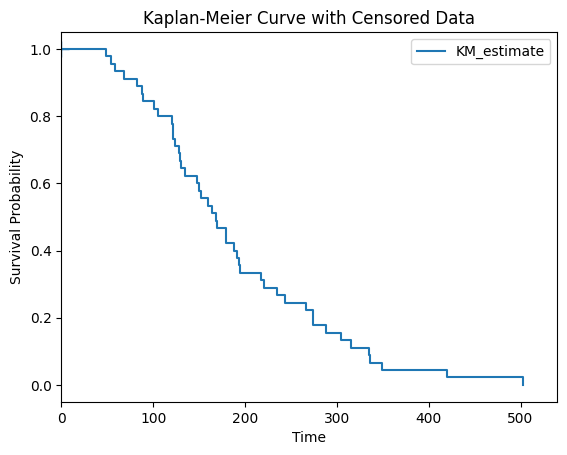

mPFS: 168.40000000002328
1-year PFS: 0.04444444444444445
half-year PFS: 0.4222222222222222


In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
data = {
    'Time': 统计['df_time'],
    'Event': 统计['有无PFS事件']
}
df = pd.DataFrame(data)
# Create a new column for censoring information
#df['Censor'] = np.where(df['event'] == 1, 1, 0)
# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Plot the KM curve
kmf.plot(ci_show=False,show_censors=True)


# Get censored data points
#censored_times = df.loc[df['Event'] == 0, 'Time']

#print(censored_times)

# Customize the plot
plt.xlim(0, 540)
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve with Censored Data')

# Show the plot
plt.show()




mpfs = kmf.median_survival_time_

# Print the mPFS
print("mPFS:", mpfs)

# Calculate 95% confidence interval
#ci = kmf.confidence_interval_()
#print("95% CI:", ci)

ci = kmf.confidence_interval_

# Print the 95% CI
#print("95% CI for mPFS of 169:", ci)

pfs_1_year = kmf.predict(365)
pfs_half_year = kmf.predict(182 )

# Print the PFS values
print("1-year PFS:", pfs_1_year)
print("half-year PFS:", pfs_half_year)


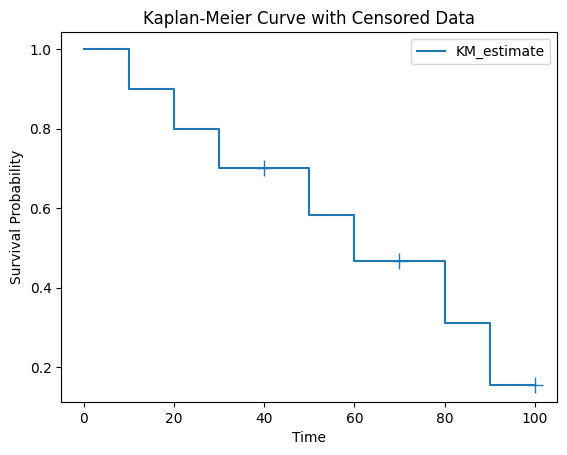

In [162]:
#Example
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Example survival data
data = {'Time': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'Event': [1, 1, 1, 0, 1, 1, 0, 1, 1, 0]}

df = pd.DataFrame(data)

# Compute Kaplan-Meier estimates with censored data
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Plot the KM curve with censored data
kmf.plot(ci_show=False, show_censors=True)

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve with Censored Data')

# Show the plot
plt.show()

In [112]:

# Convert date columns to datetime data type
紫杉醇用药时间={'start':统计['紫杉醇脂质体开始日期'] ,'end': 统计['紫杉醇脂质体结束日期']}
紫杉醇时间=pd.DataFrame(紫杉醇用药时间)
紫杉醇时间['start'] = pd.to_datetime(紫杉醇时间['start'] )
紫杉醇时间['end'] = pd.to_datetime(紫杉醇时间['end'])

# Subtract the columns and create a new column with the result
紫杉醇时间['date_difference'] = 紫杉醇时间['end'] - 紫杉醇时间['start']

# Print the resulting dataset

print(紫杉醇时间['date_difference'])



0     21 days
1    106 days
2    102 days
3     30 days
4     73 days
       ...   
95    51 days
96    23 days
97    26 days
98     0 days
99     0 days
Name: date_difference, Length: 100, dtype: timedelta64[ns]


In [113]:
统计['date_difference']=紫杉醇时间['date_difference']

统计['date_difference'] = 统计['date_difference'].apply(lambda x: x.total_seconds())

# Print the DataFrame with the converted values


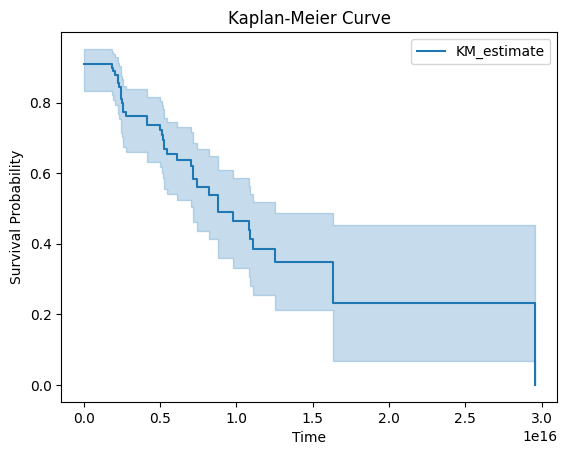

mPFS: 8812800000000000.0


In [114]:
data = {
    'time': 紫杉醇时间['date_difference'],
    'event': 统计['有无PFS事件']
}
df = pd.DataFrame(data)

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['event'])
# Generate KM curve
kmf.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curve')
plt.show()

mpfs = kmf.median_survival_time_

# Print the mPFS
print("mPFS:", mpfs)

In [115]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create two sample datasets for comparison
group1 = {
    'time': 统计['df_time'],
    'event': 统计['有无PFS事件']
}

group2 = {
    'time': 统计['df_time'],
    'event': 统计['NAPFS']
}

df_group1 = pd.DataFrame(group1)
df_group2 = pd.DataFrame(group2)

# Fit Kaplan-Meier estimators for each group
kmf_group1 = KaplanMeierFitter()
kmf_group1.fit(df_group1['time'], event_observed=df_group1['event'])

kmf_group2 = KaplanMeierFitter()
kmf_group2.fit(df_group2['time'], event_observed=df_group2['event'])

# Perform log-rank test
results = logrank_test(df_group1['time'], df_group2['time'], df_group1['event'], df_group2['event'])

# Print the log-rank test statistic and p-value
print("Log-Rank Test Statistic: %.2f" % results.test_statistic)
print("Log-Rank Test p-value: %.4f" % results.p_value)

Log-Rank Test Statistic: 45.00
Log-Rank Test p-value: 0.0000


In [116]:
#logrank for 2 groups
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Create two sample datasets for comparison
group1 = {
    'time': [10, 15, 20, 25, 30],
    'event': [1, 0, 1, 0, 1]
}

group2 = {
    'time': [5, 10, 15, 20, 25],
    'event': [1, 1, 0, 1, 0]
}

df_group1 = pd.DataFrame(group1)
df_group2 = pd.DataFrame(group2)

# Fit Kaplan-Meier estimators for each group
kmf_group1 = KaplanMeierFitter()
kmf_group1.fit(df_group1['time'], event_observed=df_group1['event'])

kmf_group2 = KaplanMeierFitter()
kmf_group2.fit(df_group2['time'], event_observed=df_group2['event'])

# Perform log-rank test
results = logrank_test(df_group1['time'], df_group2['time'], df_group1['event'], df_group2['event'])

# Print the log-rank test statistic and p-value
print("Log-Rank Test Statistic: %.2f" % results.test_statistic)
print("Log-Rank Test p-value: %.4f" % results.p_value)

Log-Rank Test Statistic: 0.63
Log-Rank Test p-value: 0.4269


In [137]:
#recoding for cox model
#print(年龄recode)
统计['age']=年龄recode['Age_Category']
#sex
# Example DataFrame
data = {'Gender': 统计['性别']}
sex = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
sex['Gender'] = sex['Gender'].replace({'男': 1, '女': 0})
# Print the updated DataFrame
#print(sex)

统计['sex']=sex

# recoding bingli
统计['清病理']=统计['清病理'].fillna(0)


data = {'病理': 统计['清病理']}
bingli = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
bingli['病理'] = bingli['病理'].replace({'鳞状细胞癌': 0, '非小细胞癌': 1,'腺癌':2})
# Print the updated DataFrame
#print(bingli)

统计['bingli']=bingli

#TNM
data = {'TNM分期': 统计['TNMre']}
tnm = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
tnm['TNM分期'] = tnm['TNM分期'].replace({'III': 0, 'IV': 1})
# Print the updated DataFrame
#print(tnm)

统计['tnm']=tnm

#EGFR
# Create a DataFrame with 59 occurrences of 1 and 41 occurrences of 0
data = {'Column': [1] * 1 + [0] * 99}
dfq = pd.DataFrame(data)

# Print the DataFrame
print(dfq)

统计['egfr']=dfq

import pandas as pd

# Create a DataFrame with 59 occurrences of 1 and 41 occurrences of 0
data = {'Column': [1] * 59 + [0] * 41}
df = pd.DataFrame(data)

# Print the DataFrame
#print(df)

统计['orr']=df
data1 = {'Column': [1] * 34 + [0] * 66}
df1 = pd.DataFrame(data1)

# Print the DataFrame
#print(df1)

统计['不良反应大于三级']=df1
data = {'最大用药': 统计['最大用药周期数更新']}
最大用药 = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
最大用药['最大用药'] = 最大用药['最大用药'].replace({2: 0, 3: 0,4:1,5:1,6:1,7:1,8:1})
# Print the updated DataFrame
#print(bingli)
统计['最大用药']=最大用药


data = {'联合免疫': 统计['联合免疫用药周期数']}
联合免疫 = pd.DataFrame(data)
# Recode '男' to 1 and '女' to 0
联合免疫['联合免疫'] = 联合免疫['联合免疫'].replace({1:0,2: 0, 3: 0,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1})
# Print the updated DataFrame
#print(bingli)
统计['联合免疫']=联合免疫




data = {'紫杉醇剂量': 统计['紫杉醇脂质体总剂量（mg）']}

紫杉醇剂量 = pd.DataFrame(data)

紫杉醇剂量['紫杉醇剂量'] = np.where(紫杉醇剂量['紫杉醇剂量'] <= 794, 0, 1)

统计['紫杉醇剂量']=紫杉醇剂量


    Column
0        1
1        0
2        0
3        0
4        0
..     ...
95       0
96       0
97       0
98       0
99       0

[100 rows x 1 columns]


In [118]:
print(统计['df_time'])

0     334.6
1       0.0
2     419.8
3     150.0
4       0.0
      ...  
95      0.0
96      0.0
97      0.0
98     68.8
99     48.4
Name: df_time, Length: 100, dtype: float64


In [139]:
import pandas as pd
from lifelines import CoxPHFitter

# Create a sample dataset
data = {
    'time': 统计['df_time'],
    'event': 统计['有无PFS事件'],
    'age': 统计['age'],
    'sex': 统计['sex'],
    'bingli': 统计['bingli'],
    'tnm': 统计['tnm'] ,
    'egfr': 统计['egfr'],
    'orr': 统计['orr'],
    '最大用药': 统计['最大用药'],
    '紫杉醇剂量': 统计['紫杉醇剂量'],
    '联合免疫': 统计['联合免疫']
}

df = pd.DataFrame(data)

# Fit Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(df, 'time', event_col='event', show_progress=False)

# Get the hazard ratios
hr = cph.hazard_ratios_
print(hr)
# 95%CI and logrank
# Print the hazard ratios
ci = cph.confidence_intervals_.apply(np.exp)
print("95% CI:", ci)

results = logrank_test(df['egfr'], df['event'], df['egfr'])

# Extract the p-value from the test results
p_value = results.p_value

#Print the log-rank p-value
print("Log-rank p-value:", p_value)

print(cph.summary['p'])

covariate
age       0.613558
sex       0.689853
bingli    2.931661
tnm       1.025537
egfr      0.776501
orr       0.762612
最大用药      0.637536
紫杉醇剂量     1.811540
联合免疫      0.587492
Name: exp(coef), dtype: float64
Log-rank p-value: 3.686116065273691e-18
covariate
age       0.205832
sex       0.737256
bingli    0.014250
tnm       0.953513
egfr      0.820093
orr       0.491502
最大用药      0.203443
紫杉醇剂量     0.198764
联合免疫      0.292916
Name: p, dtype: float64


In [120]:
## 三. 疗效评估

In [121]:
疗效评价=统计['最佳疗效']

# number of PR
# Count the occurrences of a specific string in a column
PR = 'PR'
count = (统计['最佳疗效'] == PR).sum()
# Print the count
print("Count of '{}' is {}".format(PR, count))

# number of SD
# Count the occurrences of a specific string in a column
SD = 'SD'
count = (统计['最佳疗效'] == SD).sum()
# Print the count
print("Count of '{}' is {}".format(SD, count))

# number of PD
# Count the occurrences of a specific string in a column
PD = 'PD'
count = (统计['最佳疗效'] == PD).sum()
# Print the count
print("Count of '{}' is {}".format(PD, count))
# number of CR
# Count the occurrences of a specific string in a column
CR = 'CR'
count = (统计['最佳疗效'] == CR).sum()
# Print the count
print("Count of '{}' is {}".format(CR, count))

#PR SD PD CR
PR=43/(43+29+4+4)
print("PR='{}'".format(PR))
SD=29/(43+29+4+4)
print("SD='{}'".format(SD))
PD=4/(43+29+4+4)
print("PD='{}'".format(PD))
CR=4/(43+29+4+4)
print("CR='{}'".format(CR))

#ORR DCR
ORR=CR+PR
print("ORR='{}'".format(ORR))
DCR=ORR+SD
print("DCR='{}'".format(DCR))

Count of 'PR' is 43
Count of 'SD' is 29
Count of 'PD' is 4
Count of 'CR' is 4
PR='0.5375'
SD='0.3625'
PD='0.05'
CR='0.05'
ORR='0.5875'
DCR='0.95'


In [122]:
from statsmodels.stats.proportion import proportion_confint

# Calculate 95% CI for ORR
orr_count = int(0.588 * 100)  # Convert percentage to count
orr_total = 100  # Total sample size for ORR
orr_ci = proportion_confint(orr_count, orr_total, alpha=0.05, method='wilson')

print("95% CI for ORR:", orr_ci)

# Calculate 95% CI for DCR
dcr_count = int(0.95 * 100)  # Convert percentage to count
dcr_total = 100  # Total sample size for DCR
dcr_ci = proportion_confint(dcr_count, dcr_total, alpha=0.05, method='wilson')

print("95% CI for DCR:", dcr_ci)

95% CI for ORR: (0.4820648670304296, 0.6720161732564526)
95% CI for DCR: (0.8882495307680808, 0.9784563208456319)


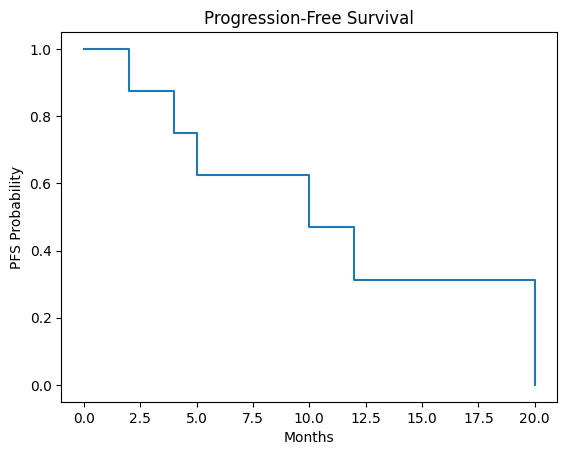

In [125]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Example PFS data
data = {'Time': [2, 4, 5, 8, 10, 12, 15, 20],
        'Event': [1, 1, 1, 0, 1, 1, 0, 1]}

df = pd.DataFrame(data)

# Compute Kaplan-Meier estimates
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Create the survival table by month
timeline = range(0, df['Time'].max() + 1)
survival_prob = kmf.survival_function_

# Plot the PFS curve
plt.step(survival_prob.index, survival_prob['KM_estimate'], where="post")
plt.xlabel('Months')
plt.ylabel('PFS Probability')
plt.title('Progression-Free Survival')
plt.show()
